# CROCUS AIR QUALITY INVESTIGATION


---

## Overview
For [CROCUS](https://crocus-urban.org/), air qaulity instrumentation have been deployed at multiple locations within the city.  

These instruments measure particles and gases within the atmosphere that are known to be hazardous to humans. 

We are going to focus on a particularly hazardous event, when Canadian wild fires resulted in the [worst air quality in Chicago's history](https://www.chicagotribune.com/weather/ct-air-quality-alert-high-risk-swimming-20230627-kbv6oh3w4jcgjadfd37iwacbp4-story.html)

<img src="../../images/Northwestern_CROCUS_node.jpg" width=500 alt="NU CROCUS Node"></img>

## Prerequisites

Before we begin, you should be aware of these examples and documentation! 

The [Project Pythia](https://projectpythia.org/) has tremendous examples and *foundations* to explore. 

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Getting Started with Python](https://foundations.projectpythia.org/foundations/getting-started-python.html) | Necessary | The Basics
| [Getting Started with Jupyter](https://foundations.projectpythia.org/foundations/getting-started-jupyter.html) | Necessary | Learn This Notebook Interface
| [Working with Pandas Dataframes](https://foundations.projectpythia.org/core/pandas.html) | Helpful | Understanding CSV Data Objects
| [X-Array!](https://foundations.projectpythia.org/core/xarray.html) | Helpful | Working with NetCDF Objects

- **Time to Learn**: 60-120 minutes

---

## Imports

In [53]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

## Read in the CROCUS Air Qaulity File

Typically, in order to do analysis on a dataset, we need to bring it into our working environment.  
A file has been pre-staged for our use, but you can also find sources that are available to be streamed

In [24]:
# with xarray open the file
ds = xr.open_dataset('../data/crocus-neiu-aqt-a1-20230627-000000.nc')

That's it! 1 line and we read in an entire day's worth of data!

## Inspect the Dataset
Now that we have the dataset read into this environment, let's see what we have

In [25]:
ds

<xarray.Dataset>
Dimensions:           (time: 1440)
Coordinates:
  * time              (time) int64 1687824003575754591 ... 1687910343626000526
Data variables: (12/23)
    name              (time) <U18 ...
    meta.description  (time) <U52 ...
    meta.host         (time) <U26 ...
    meta.job          (time) <U10 ...
    meta.missing      (time) <U7 ...
    meta.node         (time) <U16 ...
    ...                ...
    no2               (time) float64 ...
    co                (time) float64 ...
    temperature       (time) float64 ...
    humidity          (time) float64 ...
    pressure          (time) float64 ...
    dewpoint          (time) float64 ...
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    CAMS_tag:     CMS-AQT-001
    datastream:   CMS_aqt580_NEIU_a1
    datalevel:    a1
    latitude:     41.9804526
    longitude:    -87.7196038

Access the air temperature data within the dataset

In [28]:
ds['temperature']

<xarray.DataArray 'temperature' (time: 1440)>
array([23.1, 23.1, 23.1, ..., 18.7, 18.6, 18.6])
Coordinates:
  * time     (time) int64 1687824003575754591 ... 1687910343626000526
Attributes:
    standard_name:  air_temperature
    units:          celsius

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Question</p>
    Does anyone know what these values for time mean?
</div>

## Convert the Time from UNIX timestamp to Datetime
Files may use the internal clock of the computer to stamp data, known as the UNIX timestamp  

In this format, data are encoded to be nanaseconds since 1 Jan 1970

While this is a valid time, it is not entirely helpful to view.  

Therefore, we need to convert to a readible timestamp

In [33]:
# Check the data
ds['time'].data[0]

1687824003575754591

In [47]:
time = pd.to_datetime(ds['time'].data)
time

DatetimeIndex(['2023-06-27 00:00:03.575754591',
               '2023-06-27 00:01:03.619294362',
               '2023-06-27 00:02:03.665321941',
               '2023-06-27 00:03:03.710131254',
               '2023-06-27 00:04:03.755022034',
               '2023-06-27 00:05:03.791415033',
               '2023-06-27 00:06:03.840875598',
               '2023-06-27 00:07:03.890878463',
               '2023-06-27 00:08:03.937381083',
               '2023-06-27 00:09:03.975372986',
               ...
               '2023-06-27 23:50:04.245524629',
               '2023-06-27 23:51:04.277296219',
               '2023-06-27 23:52:04.324026747',
               '2023-06-27 23:53:04.369976912',
               '2023-06-27 23:54:04.415589509',
               '2023-06-27 23:55:04.460928845',
               '2023-06-27 23:56:04.495861572',
               '2023-06-27 23:57:04.543655429',
               '2023-06-27 23:58:04.586405253',
               '2023-06-27 23:59:03.626000526'],
              dtype=

In [48]:
ds['time'] = time

Let's check the temperature data again

In [50]:
ds['temperature']

<xarray.DataArray 'temperature' (time: 1440)>
array([23.1, 23.1, 23.1, ..., 18.7, 18.6, 18.6])
Coordinates:
  * time     (time) datetime64[ns] 2023-06-27T00:00:03.575754591 ... 2023-06-...
Attributes:
    standard_name:  air_temperature
    units:          celsius

## Display the Time Series of Atmospheric Particles

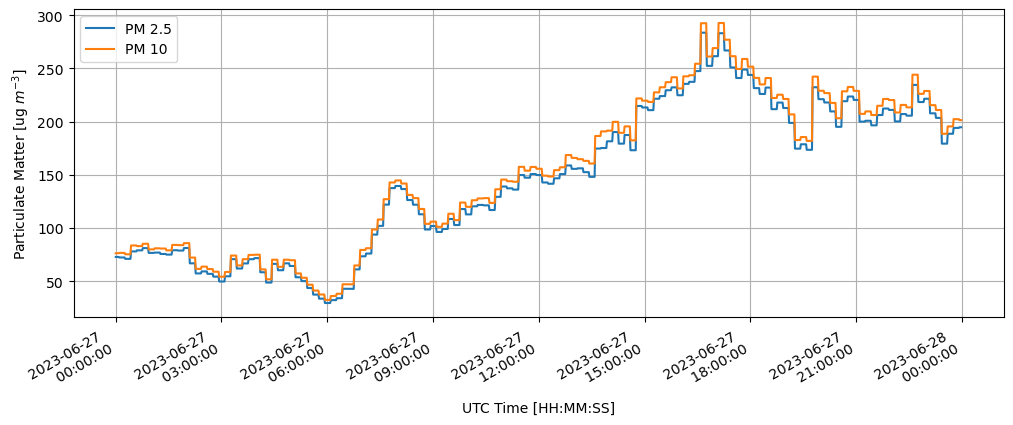

In [66]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: send the matplotlib axes to the xarray plotting!
ds['pm2.5'].plot(ax=axs, label='PM 2.5')
ds['pm10.0'].plot(ax=axs, label='PM 10')

# Now define all the axis labels for the figure
axs.set_xlabel('UTC Time [HH:MM:SS]')
axs.set_ylabel(r'Particulate Matter [ug $m^{-3}$]') # notice the superscript in the plot!

# Define the legend
axs.legend(loc='upper left')

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Question</p>
    Above what concentration is PM 2.5 dangerous?
</div>

---

## Summary
In this notebook, we explored CROCUS air quality data from Northeastern Illinois Univeristy during a wildfire smoke event in the Summer of 2023.  

Users learned to:
1. Open a NetCDF file with Xarray
2. Change the time formatting to help with analysis
3. Display the time series of data to explore the event

### What's next?
Try out the following Assignments to test your new python skills!

----

## Assignments

This past summer, one of my SULI interns explored air quality from this exact event for multiple locations throughout the city. Below are questions you could expect to recieve during your internship as part of your analysis. 


<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Question 1</p>
    The EPA has determined that concentrations of Particulate Matter 2.5  
    above 35 ug per cubic meter within a 24 hour period is unhealthy.  What is the 24 hour average concentration of PM2.5 within this dataset?
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Question 2</p>
    Particles within the Atmosphere have a profound impact on solar radiation reaching Earth's surface. What is the relationship between PM2.5 concentrations and the ambient air temperature within this dataset?
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Question 3</p>
     To determine if this is a historic event for Chicago, a closer look at the peak of the PM2.5 and PM10 distribution is needed. Update the time series plot to only display the data starting an hour before the peak and an hour after the peak. 
</div>